# A demo of spherical aberrations 
## introduced by coverslip and refractive index mismatch 
## between aqueous sample, glass coverslip, and immersion media

**Assumptions:**

1. point source is inside an aqueous sample at varyng depth from the coverslip: 0 - 80 microns

2. standard coverslip No1.5, thickness 170 microns

3. only sample|glass|immersion media are simulated. The objective is not simulated.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
n_sampleArray = [1.33, 1.37, 1.47] #water: 1.33; life worm: 1.37; fixed and mounted in ProLong Gold: 1.47
n_sample = n_sampleArray[0]
# n= 1.37 @ 633 nm is C.elegans RI, ref: https://www.ncbi.nlm.nih.gov/pubmed/17694065/
n_glass = 1.5230 #@589 nm, D263M borosilicate glass for coverslips, from Fischer Scientific datasheet
thickness_glass = 170. #microns, No1.5 standard glass
thickness_media = 250. #um, immersion media thickness until some dummy surface, for ray plotting

n_immersionArray = np.array([1.0, 1.3325, 1.4722, 1.515]) #air, water, glycerol, immersion oil
immersionLabel = ['air','water','glycerol', 'oil']
sourceDistanceArray = np.array([0, 10, 40, 80])# microns, distance from point source to coverslip surface
thetaRadArray = np.linspace(5,60,5)/180.0*np.pi #ray angle from the point source, in radians

NA = np.sin(thetaRadArray[-1])*n_sample #max NA of the system, using sample refractive index

In [3]:
# ray tracing, sags [x], axial heights [y] and angles [thetas]
# coordinate origin X at sample | glass boundary
def ray_tracing(sourceDistance, n_sample, n_glass, n_immersion, thickness_media):
    #rays origin
    x0 = -sourceDistance*np.ones(thetaRadArray.shape)
    y0 = np.zeros(thetaRadArray.shape)
    #rays refract from sample to glass
    x1 = x0 + sourceDistance * np.ones(thetaRadArray.shape)
    y1 = y0 + sourceDistance * np.tan(thetaRadArray)
    sinTheta1 = n_sample/n_glass * np.sin(thetaRadArray)
    tanTheta1 = sinTheta1/(np.sqrt(1-sinTheta1**2))

    #rays refract from glass to immersion media
    x2 = x1 + thickness_glass
    y2 = y1 + thickness_glass*tanTheta1
    sinTheta2 = n_glass/n_immersion * sinTheta1
    tanTheta2 = sinTheta2/(np.sqrt(1-sinTheta2**2))

    #rays travel until some dummy surface
    x3 = x2 + thickness_media
    y3 = y2 + thickness_media * tanTheta2
    return (x0,y0,x1,y1,x2,y2,x3,y3,tanTheta2) 

### Plot refracted rays emanating from a point souce, located 10 or 80 microns deep

C:\Users\nvladim\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: invalid value encountered in sqrt


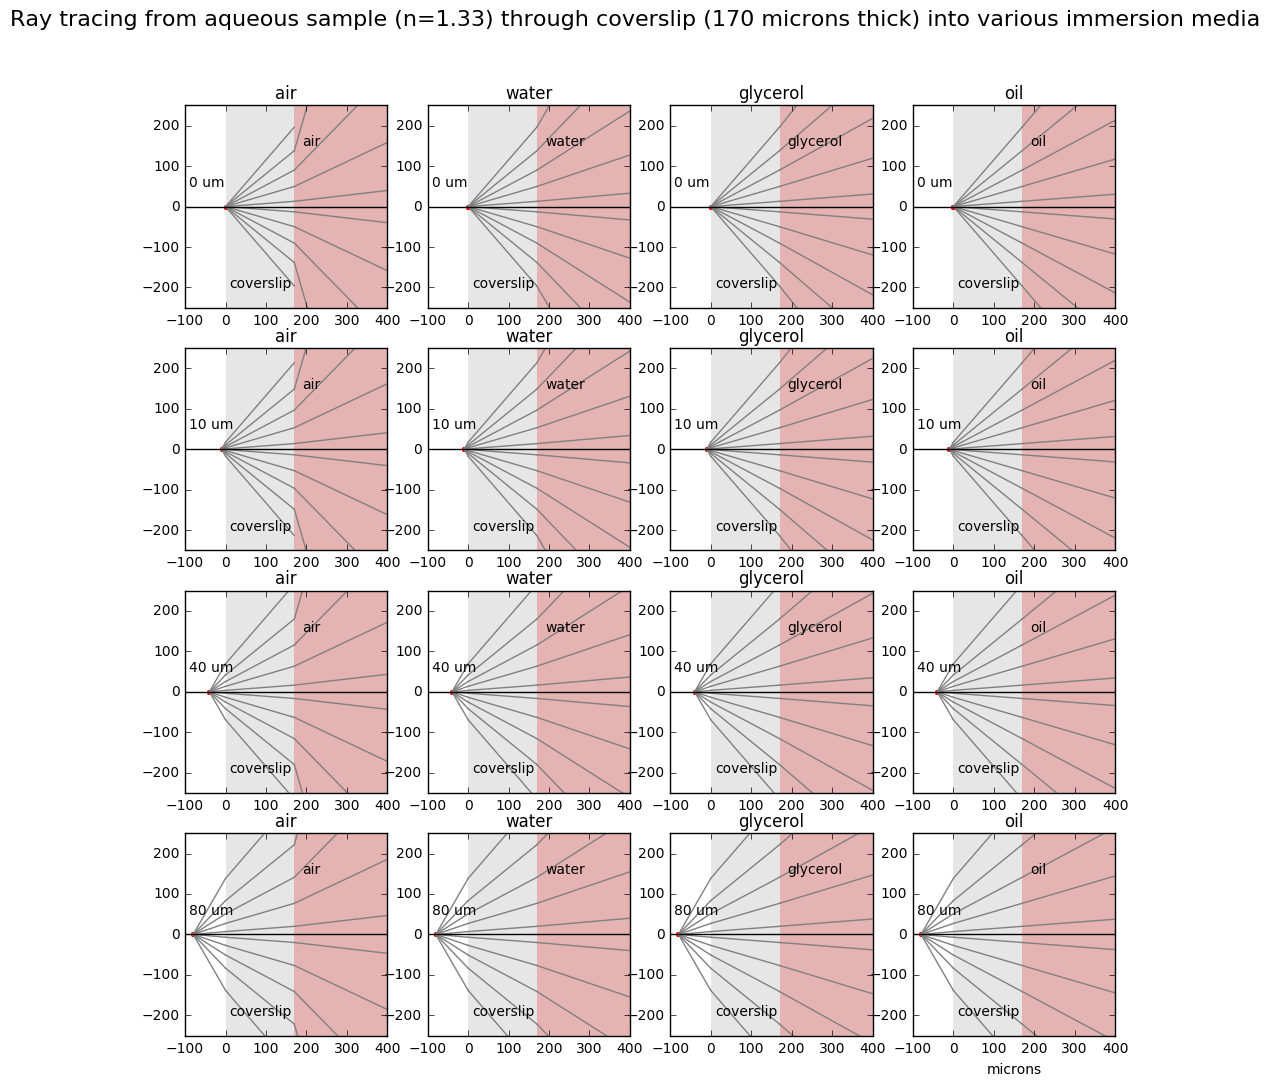

In [61]:
fig, ax = plt.subplots(len(sourceDistanceArray),len(n_immersionArray),\
                       figsize = (3*len(n_immersionArray), 3*len(sourceDistanceArray)))
fig.suptitle('Ray tracing from aqueous sample (n=1.33) through coverslip (170 microns thick) into various immersion media', fontsize=16)


for i_distance in range(len(sourceDistanceArray)):
    for i_immersion in range(len(n_immersionArray)):
        ax[i_distance,i_immersion].bar(0, 500, width=thickness_glass, bottom=-250,color = [0.9, 0.9, 0.9], linewidth=0)
        ax[i_distance,i_immersion].bar(0 + thickness_glass, 500, width=thickness_media, \
                  bottom=-250,color = [0.9, 0.7, 0.7], linewidth=0)
        
        (x0,y0,x1,y1,x2,y2,x3,y3,tanTheta2) = ray_tracing(sourceDistanceArray[i_distance],\
                                                          n_sample, n_glass,\
                                                          n_immersionArray[i_immersion],thickness_media)
        ax[i_distance,i_immersion].plot(x0,y0,'r.')
        # above the X axis
        ax[i_distance,i_immersion].plot([x0, x1], [y0, y1],'gray' )
        ax[i_distance,i_immersion].plot([x1, x2], [y1, y2],'gray' )
        ax[i_distance,i_immersion].plot([x2, x3], [y2, y3],'gray' )
        # below the X axis
        ax[i_distance,i_immersion].plot([x0, x1], [-y0, -y1],'gray' )
        ax[i_distance,i_immersion].plot([x1, x2], [-y1, -y2],'gray' )
        ax[i_distance,i_immersion].plot([x2, x3], [-y2, -y3],'gray' )        
        
        ax[i_distance,i_immersion].set_aspect('equal', 'box')
        ax[i_distance,i_immersion].set_xlim([-100, 400])
        ax[i_distance,i_immersion].set_ylim([-250, 250])
        ax[i_distance,i_immersion].set_title(immersionLabel[i_immersion])
        ax[i_distance,i_immersion].axhline(y=0, color='k')
        #ax[i_distance,i_immersion].text(-90,150,'sample')
        ax[i_distance,i_immersion].text(-90,50,str(sourceDistanceArray[i_distance]) + ' um')
        ax[i_distance,i_immersion].text(10,-200,'coverslip')
        ax[i_distance,i_immersion].text(thickness_glass + 20,150,immersionLabel[i_immersion])
ax[-1,-1].set_xlabel('microns')

### Find the axial points where rays seem to come from (apparent sources) and plot them

C:\Users\nvladim\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: invalid value encountered in sqrt


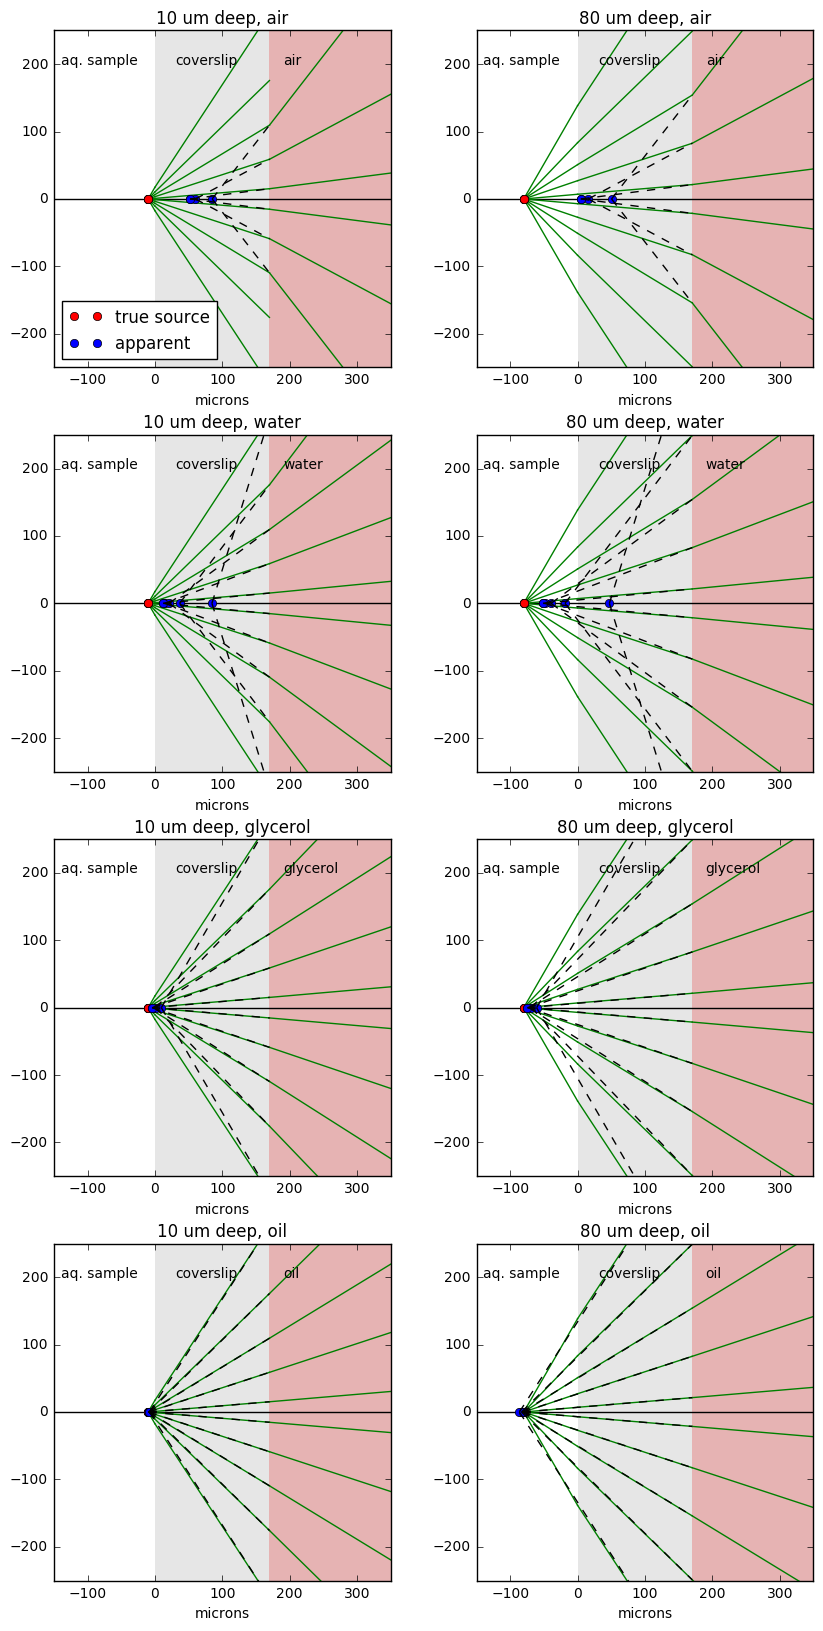

In [73]:
indSourceDist = [1,3]
fig, ax = plt.subplots(len(n_immersionArray),len(indSourceDist),\
                       figsize = (5*len(indSourceDist),5*len(n_immersionArray)))

for i_distance in range(len(indSourceDist)):
    for i_immersion in range(len(n_immersionArray)):
        ax[i_immersion,i_distance].bar(0, 500, width=thickness_glass, bottom=-250,color = [0.9, 0.9, 0.9], linewidth=0)
        ax[i_immersion,i_distance].bar(thickness_glass, 500, width=thickness_media, \
                  bottom=-250,color = [0.9, 0.7, 0.7], linewidth=0)
        #true source
        (x0,y0,x1,y1,x2,y2,x3,y3,tanTheta2) = ray_tracing(sourceDistanceArray[indSourceDist[i_distance]],\
                                                          n_sample, n_glass,\
                                                          n_immersionArray[i_immersion],\
                                                          thickness_media)
        ax[i_immersion,i_distance].axhline(y=0, color='k')
        #above X axis
        ax[i_immersion,i_distance].plot([x0, x1], [y0, y1],'green' )
        ax[i_immersion,i_distance].plot([x1, x2], [y1, y2],'green' )
        ax[i_immersion,i_distance].plot([x2, x3], [y2, y3],'green' )
        #below X axis
        ax[i_immersion,i_distance].plot([x0, x1], [-y0, -y1],'green' )
        ax[i_immersion,i_distance].plot([x1, x2], [-y1, -y2],'green' )
        ax[i_immersion,i_distance].plot([x2, x3], [-y2, -y3],'green' )        
        ax[i_immersion,i_distance].plot(x0,y0,'ro',label = 'true source')
        #apparent source
        apparent_x0 = x2 - y2/tanTheta2
        ax[i_immersion,i_distance].plot(apparent_x0,y0,'bo')
        ax[i_immersion,i_distance].plot(apparent_x0[0],y0[0],'bo',label='apparent')
        ax[i_immersion,i_distance].plot([apparent_x0,x2],[y0,y2],'k--')
        ax[i_immersion,i_distance].plot([apparent_x0,x2],[-y0,-y2],'k--')

        ax[i_immersion,i_distance].set_aspect('equal', 'box')
        ax[i_immersion,i_distance].set_xlim([-150, 350])
        ax[i_immersion,i_distance].set_ylim([-250, 250])
        #ax[i].grid(True, which='both')
        ax[i_immersion,i_distance].text(-140,200,'aq. sample')
        ax[i_immersion,i_distance].text(30,200,'coverslip')
        ax[i_immersion,i_distance].set_title(str(sourceDistanceArray[indSourceDist[i_distance]]) + ' um deep, ' + immersionLabel[i_immersion])
        ax[i_immersion,i_distance].text(thickness_glass + 20,200,immersionLabel[i_immersion])
        ax[i_immersion,i_distance].set_xlabel('microns')
ax[0,0].legend(loc='lower left')

### Plot the positions of true and apparent sources

C:\Users\nvladim\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: invalid value encountered in sqrt


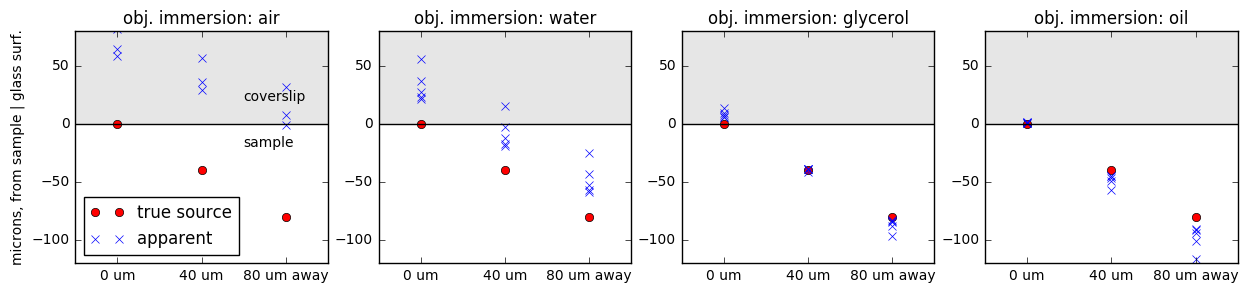

In [66]:
fig, ax = plt.subplots(1,4,figsize = (15,3))
for i in range(len(n_immersionArray)):
    ax[i].bar(-1, 170, 4, color = [0.9, 0.9, 0.9], linewidth=0)
    #source at the glass surface 
    (x0,y0,x1,y1,x2,y2,x3,y3,tanTheta2) = ray_tracing(sourceDistanceArray[0],\
                                                      n_sample, n_glass,\
                                                      n_immersionArray[i],thickness_media)  
    apparent_x0 = x2 - y2/tanTheta2
    ax[i].plot(0,x0[0],'ro')  
    ax[i].plot(0*np.ones(len(apparent_x0)),apparent_x0,'bx')

    #source 20 um away  
    (x0,y0,x1,y1,x2,y2,x3,y3,tanTheta2) = ray_tracing(sourceDistanceArray[2],\
                                                      n_sample, n_glass,\
                                                      n_immersionArray[i],thickness_media)  
    apparent_x0 = x2 - y2/tanTheta2
    ax[i].plot(1,x0[0],'ro')  
    ax[i].plot(np.ones(len(apparent_x0)),apparent_x0,'bx')
    
    #source 80 um away
    (x0,y0,x1,y1,x2,y2,x3,y3,tanTheta2) = ray_tracing(sourceDistanceArray[3],\
                                                      n_sample, n_glass,\
                                                      n_immersionArray[i],thickness_media)
    apparent_x0 = x2 - y2/tanTheta2
    ax[i].plot(2,x0[0],'ro',label='true source')  
    ax[i].plot(2*np.ones(len(apparent_x0)),apparent_x0,'bx',label='apparent')
    
    ax[i].set_xlim([-0.5, 2.5])
    ax[i].set_ylim([-120, 80])
    ax[i].axhline(y=0, color='k')
    ax[i].set_xticks([0,1,2])
    ax[i].set_xticklabels(['0 um', '40 um', '80 um away'])
    ax[i].set_title('obj. immersion: ' + immersionLabel[i])
    
ax[0].legend(loc='lower left')    
ax[0].set_ylabel('microns, from sample | glass surf.')
ax[0].text(1.5,20,'coverslip')
ax[0].text(1.5,-20,'sample')


## Compare to ray tracing model from Wan etal, 2000

Wan DS, Rajadhyaksha M, Webb RH. 
Analysis of spherical aberration of a water immersion objective: application to specimens with refractive indices 1.33-1.40.
J Microsc. 2000 Mar;197(Pt 3):274-84.
https://www.ncbi.nlm.nih.gov/pubmed/10692131

In [67]:
def sphericalAberrationsModel(sourceDistance, n_sample, n_glass, n_immersion, thickness_glass, NA):
    # positions of virtual source points, at various NA
    virtual_x0_highNA = thickness_glass \
                        - sourceDistance*np.sqrt((n_immersion**2 - NA**2)/(n_sample**2 - NA**2)) \
                        - thickness_glass*np.sqrt((n_immersion**2 - NA**2)/(n_glass**2 - NA**2))
    virtual_x0_lowNA =  thickness_glass \
                        - sourceDistance * n_immersion/n_sample \
                        - thickness_glass*n_immersion/n_glass
    return (virtual_x0_lowNA, virtual_x0_highNA)

### Plot the distribution of apparent sources

C:\Users\nvladim\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: invalid value encountered in sqrt
C:\Users\nvladim\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


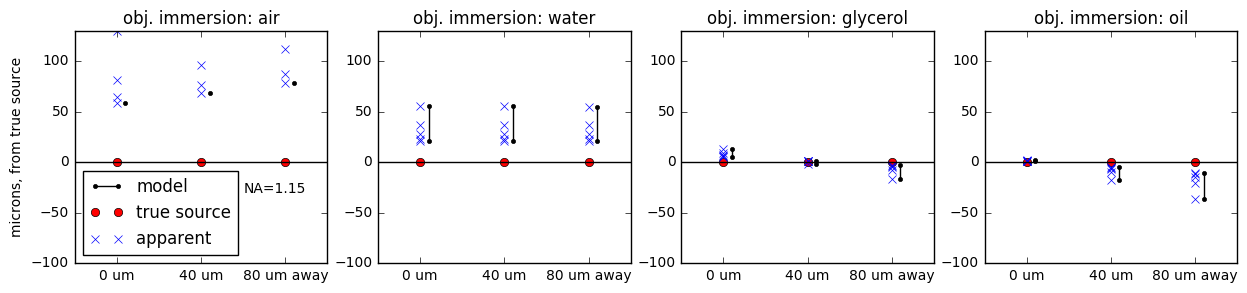

In [70]:
fig, ax = plt.subplots(1,4,figsize = (15,3))
for i in range(len(n_immersionArray)):
    #source at the glass surface 
    (x0,y0,x1,y1,x2,y2,x3,y3,tanTheta2) = ray_tracing(sourceDistanceArray[0],\
                                                      n_sample, n_glass,\
                                                      n_immersionArray[i],\
                                                      thickness_media)  
    virtual_x0 = x2 - y2/tanTheta2
    ax[i].plot(0,0,'ro')  
    ax[i].plot(0*np.ones(len(virtual_x0)),virtual_x0 - x0,'bx')
    # model of Wan_etal_2000
    (virtual_x0_lowNA, virtual_x0_highNA) = sphericalAberrationsModel(sourceDistanceArray[0], \
                                                                      n_sample, n_glass, \
                                                                      n_immersionArray[i],\
                                                                      thickness_glass, NA)
    ax[i].plot([0.1, 0.1],[virtual_x0_lowNA - x0[0], virtual_x0_highNA - x0[0]],'k.-', label = 'model') 

    #source 40 um away  
    (x0,y0,x1,y1,x2,y2,x3,y3,tanTheta2) = ray_tracing(sourceDistanceArray[2],\
                                                      n_sample, n_glass,\
                                                      n_immersionArray[i],\
                                                      thickness_media)  
    virtual_x0 = x2 - y2/tanTheta2
    ax[i].plot(1,0,'ro')  
    ax[i].plot(np.ones(len(virtual_x0)),virtual_x0 - x0,'bx')
    # model of Wan_etal_2000
    (virtual_x0_lowNA, virtual_x0_highNA) = sphericalAberrationsModel(sourceDistanceArray[2], \
                                                                      n_sample, n_glass,\
                                                                      n_immersionArray[i],\
                                                                      thickness_glass, NA)
    ax[i].plot([1.1, 1.1],[virtual_x0_lowNA - x0[0], virtual_x0_highNA - x0[0]],'k.-') 
    
    #source 80 um away
    (x0,y0,x1,y1,x2,y2,x3,y3,tanTheta2) = ray_tracing(sourceDistanceArray[3],\
                                                      n_sample, n_glass,\
                                                      n_immersionArray[i],thickness_media)
    virtual_x0 = x2 - y2/tanTheta2
    ax[i].plot(2,0,'ro',label='true source')  
    ax[i].plot(2*np.ones(len(virtual_x0)),virtual_x0 - x0,'bx',label='apparent')
    # model of Wan_etal_2000
    (virtual_x0_lowNA, virtual_x0_highNA) = sphericalAberrationsModel(sourceDistanceArray[3], \
                                                                      n_sample, n_glass, \
                                                                      n_immersionArray[i], \
                                                                      thickness_glass, NA)
    ax[i].plot([2.1, 2.1],[virtual_x0_lowNA - x0[0], virtual_x0_highNA - x0[0]],'k.-') 
    
    ax[i].set_xlim([-0.5, 2.5])
    ax[i].set_ylim([-100, 130])
    ax[i].axhline(y=0, color='k')
    ax[i].set_xticks([0,1,2])
    ax[i].set_xticklabels(['0 um', '40 um', '80 um away'])
    ax[i].set_title('obj. immersion: ' + immersionLabel[i])
    
ax[0].legend(loc='lower left')    
ax[0].set_ylabel('microns, from true source')
ax[0].text(1.5,-30,'NA='+'{:3.2f}'.format(NA))

### Plot spherical aberrations of AQUEOUS sample as a function of sample thickness (distance from coverslip)

(-60, 60)

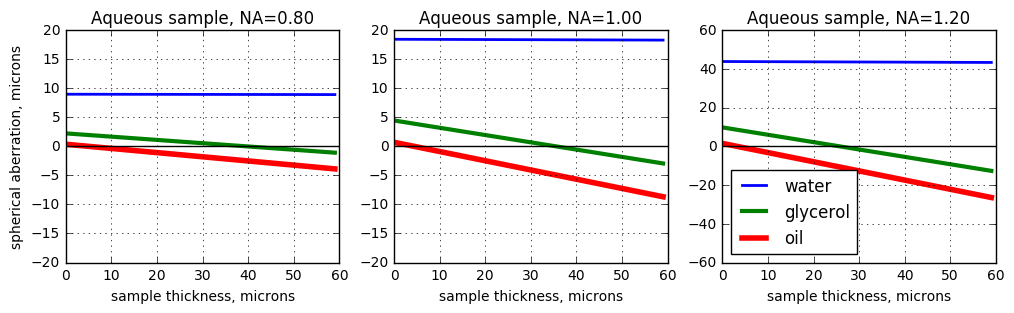

In [71]:
# skip air objectives, it's aberration are too high for practical purposes
n_sample = n_sampleArray[0] #aqueous sample

fig, ax = plt.subplots(1,3,figsize = (12,3))
NA_array = [0.8, 1.0, 1.2]
for i_NA in range(len(NA_array)):
    sphA = np.zeros((len(n_immersionArray),60))
    for i in range(1,len(n_immersionArray)):   
        for sampleThickness in range(60):
            (virtual_x0_lowNA, virtual_x0_highNA) = sphericalAberrationsModel(sampleThickness, \
                                                                              n_sample, n_glass, n_immersionArray[i], \
                                                                              thickness_glass, NA_array[i_NA])
            sphA[i,sampleThickness] = virtual_x0_highNA - virtual_x0_lowNA               
        ax[i_NA].plot(np.arange(60),sphA[i,:].T, label = immersionLabel[i], lw = i+1)
    ax[i_NA].set_xlabel('sample thickness, microns')
    ax[i_NA].set_title('Aqueous sample, NA=' + '{:3.2f}'.format(NA_array[i_NA]))
    ax[i_NA].axhline(y=0, color='k')
    ax[i_NA].grid(True, which='both')

ax[0].set_ylabel('spherical aberration, microns')
ax[2].legend(loc='lower left')  
ax[0].set_ylim([-20, 20])
ax[1].set_ylim([-20, 20])
ax[2].set_ylim([-60, 60])

### Plot spherical aberrations of FIXED sample (mounted in ProLong Gold, n=1.47) as a function of sample thickness (distance from coverslip)

(-10, 10)

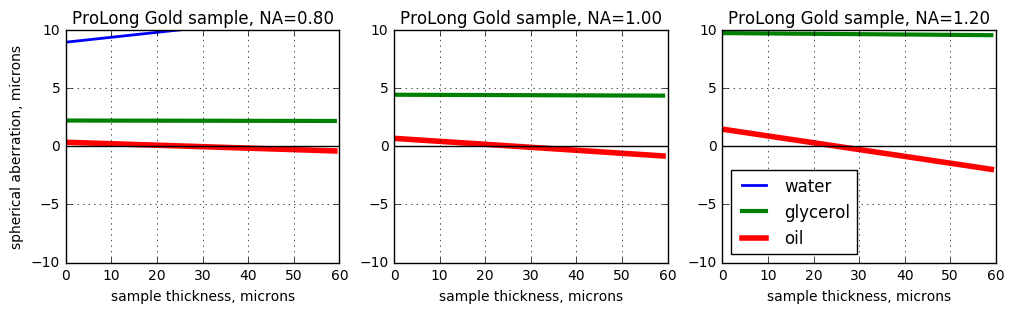

In [72]:
# skip air objectives
n_sample = n_sampleArray[2] #ProGold

fig, ax = plt.subplots(1,3,figsize = (12,3))
NA_array = [0.8, 1.0, 1.2]
for i_NA in range(len(NA_array)):
    sphA = np.zeros((len(n_immersionArray),60))
    for i in range(1,len(n_immersionArray)):   
        for sampleThickness in range(60):
            (virtual_x0_lowNA, virtual_x0_highNA) = sphericalAberrationsModel(sampleThickness, \
                                                                              n_sample, n_glass, \
                                                                              n_immersionArray[i], \
                                                                              thickness_glass, \
                                                                              NA_array[i_NA])
            sphA[i,sampleThickness] = virtual_x0_highNA - virtual_x0_lowNA               
        ax[i_NA].plot(np.arange(60),sphA[i,:].T, label = immersionLabel[i], lw = i+1)
    ax[i_NA].set_xlabel('sample thickness, microns')
    ax[i_NA].set_title('ProLong Gold sample, NA=' + '{:3.2f}'.format(NA_array[i_NA]))
    ax[i_NA].axhline(y=0, color='k')
    ax[i_NA].grid(True, which='both')

ax[0].set_ylabel('spherical aberration, microns')
ax[2].legend(loc='lower left')  
ax[0].set_ylim([-10, 10])
ax[1].set_ylim([-10, 10])
ax[2].set_ylim([-10, 10])

## Summary

### Aqueous sample

1. **Air immersion:** Spherical aberration (SphA) is huge for practical use with high-NA objectives.  

2. **Water immersion:** SphA is large but does *not* depend on sample depth. It can be corrected by adjusting the objective collar, once for all sample depths.

3. **Glycerol immersion:** SphA goes linearly from positive (close to coverslip) to zero (about 30 microns deep) to negative (deeper into the sample).

4. **Oil immersion:** SphA is nearly **zero close to coverslip** and linearly grows with the sample depth. 

### Sample mounted in ProLong Gold media

1. **Glycerol immersion:** SphA is constant and does not depend on sample depth, because RI of ProLong Gold is identical to glycerol (1.47). It can be fully corrected by the objective collar.

2. **Oil immersion:** SphA is small and linearly goes from positive (near the coverslip) to zero (~25 microns deep) to negative (deeper into the sample).

### Moral
1. If the objective has correction collar, use immersion with refractive index that matches the sample (e.g. water - water, or glycerol - ProLong Gold). Spherical aberration will be relatively large but independent of sample depth, and can be corrected by the collar. 

2. If no correction collar available, use immersion media with RI higher than sample. The SphA will be small but depending on sample depth. SphA will be minimal:

  * watery sample, oil immersion: near the coverslip.
  * watery sample, glycerol immersion: 20-30 microns deep.
  * ProLong Gold sample, oil immersion: 20-30 microns deep.

Questions and comments: nikita.vladimirov [at] mdc-berlin.de